In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline

plt.style.use('dark_background')

In [2]:
import tensorflow as tf

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [3]:
X_train = tf.image.resize(X_train[..., np.newaxis], (14, 14))[..., 0]
X_test = tf.image.resize(X_test[..., np.newaxis], (14, 14))[..., 0]

In [4]:
X_train.shape

TensorShape([60000, 14, 14])

In [5]:
X_test.shape

TensorShape([10000, 14, 14])

In [6]:
X_train = X_train[:1000]
y_train = y_train[:1000]

X_test = X_test[:1000]
y_test = y_test[:1000]

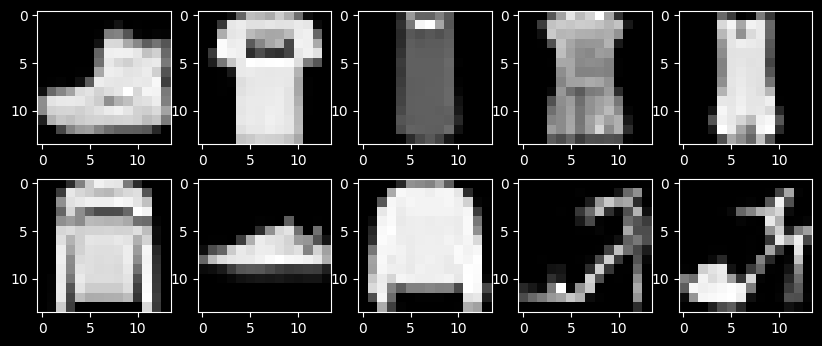

In [7]:
plt.figure(figsize=(10, 4))

dims=10

for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i, :], cmap='gray')


In [8]:
X_train = X_train.numpy()
X_train

array([[[  0.  ,   0.  ,   0.  , ...,   0.  ,   0.  ,   0.  ],
        [  0.  ,   0.  ,   0.  , ...,   0.  ,   0.25,   0.25],
        [  0.  ,   0.  ,   0.  , ...,   1.  ,   4.  ,   3.25],
        ...,
        [ 30.5 , 168.75, 188.25, ..., 178.5 , 188.  , 118.  ],
        [  0.5 ,   0.  ,  66.5 , ...,  83.5 ,  39.25,   0.  ],
        [  0.  ,   0.  ,   0.  , ...,   0.  ,   0.  ,   0.  ]],

       [[  0.  ,   0.25,   0.25, ...,  11.25,   0.  ,   0.  ],
        [  0.  ,   0.  ,  50.5 , ..., 203.25,  10.25,   0.  ],
        [  0.  ,   0.  , 153.  , ..., 212.75,  91.  ,   0.  ],
        ...,
        [  0.  ,   0.  ,   0.25, ...,   0.75,   0.  ,   0.  ],
        [  0.  ,   0.  ,   0.25, ...,   0.25,   0.  ,   0.  ],
        [  0.  ,   0.  ,   0.25, ...,   0.5 ,   0.  ,   0.  ]],

       [[  0.  ,   0.  ,   0.  , ...,   0.  ,   0.  ,   0.  ],
        [  0.  ,   0.  ,   0.  , ...,   0.  ,   0.  ,   0.  ],
        [  0.  ,   0.  ,   0.  , ...,   0.  ,   0.  ,   0.  ],
        ...,
        [  0

In [9]:
X_test = X_test.numpy()

In [10]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_train

array([[ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.25,  0.25, ...,  0.5 ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       ...,
       [ 0.  ,  0.  ,  0.  , ..., 15.5 ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ]], dtype=float32)

In [11]:
X_test = X_test.reshape(X_test.shape[0], -1)
X_test

array([[  0.  ,   0.  ,   0.  , ...,   0.  ,   0.  ,   0.  ],
       [  0.  ,   0.  ,   0.  , ..., 216.75,  47.5 ,   0.  ],
       [  0.  ,   0.  ,   0.  , ...,   0.  ,   0.  ,   0.  ],
       ...,
       [  0.  ,   0.  ,   0.  , ...,  89.25, 215.25,  72.  ],
       [  0.  ,   0.  ,   0.  , ...,   0.  ,   0.  ,   0.  ],
       [  0.  ,   0.  ,   0.  , ...,   0.  ,   0.  ,   0.  ]],
      dtype=float32)

#### Model 1 (LinearRegression)

In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)
pred_train = model.predict(X_train_scaled)
pred_test = model.predict(X_test_scaled)

print('MAE train: ', mean_absolute_error(pred_train, y_train))
print('R2 train: ', r2_score(pred_train, y_train))
print()
print('MAE test: ', mean_absolute_error(pred_test, y_test))
print('R2 test: ', r2_score(pred_test, y_test))

MAE train:  0.98506993
R2 train:  0.7518615309735829

MAE test:  1.239012
R2 test:  0.6067447586318123


#### Model 2 (PolynomialRegression)

In [14]:
%%time

pipe = make_pipeline(StandardScaler(), PolynomialFeatures(degree=2), LinearRegression())
pipe.fit(X_train, y_train)

CPU times: total: 8.38 s
Wall time: 2.12 s


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [15]:
pred_train = pipe.predict(X_train)
pred_test = pipe.predict(X_test)

print('MAE train poly: ', mean_absolute_error(pred_train, y_train))
print('R2 train poly: ', r2_score(pred_train, y_train))
print()
print('MAE test poly: ', mean_absolute_error(pred_test, y_test))
print('R2 test poly: ', r2_score(pred_test, y_test))

MAE train poly:  4.5858145e-05
R2 train poly:  0.9999999995588793

MAE test poly:  1.5273472
R2 test poly:  0.5310706602216763


Conclusion: overfitting